# Commands

In [1]:
json_folder = '../Results/'
retrieve = True
overwrite_retrieve = True

# Imports

In [2]:
import os
import requests
import json
import pandas as pd
import numpy as np
from math import sqrt, asin
from dateutil import parser
import matplotlib.pyplot as plt

# Retrieve responses

In [3]:
# List all files in the directory
all_files = os.listdir(json_folder)

# Filter out only .json files and extract bin_id from the filename
already_retrieved_bins = [file.split('.')[0] for file in all_files if file.endswith('.json')]

In [4]:
if retrieve:

    api_key = ''
    headers = {'X-Master-key': api_key, 'Content-Type': 'application/json'}

    # URL to fetch the uncategorized bins
    url = 'https://api.jsonbin.io/v3/c/uncategorized/bins/'

    while True:
        # Get uncategorized bins
        response = requests.get(url, headers=headers)
        bins = response.json()

        if 'message' in bins:
            print("Error:", bins['message'])
            break

        if not bins:
            # No more bins to fetch, break the loop
            break

        # Iterate through each bin and print its meta data (or save it as desired)
        for single_bin in bins:
            bin_id = single_bin['record']        
            
            if bin_id not in already_retrieved_bins or overwrite_retrieve:
                print('Bin ID:', bin_id)
                print('Created At:', single_bin['createdAt'])
                print('Private:', single_bin['private'])
                print('---')
            
                response = requests.get(f'https://api.jsonbin.io/v3/b/{bin_id}', headers=headers)
                with open(f'{json_folder}{bin_id}.json', 'w') as file:
                    json.dump(response.json(), file, indent=3)

        # Get the last bin ID fetched in this batch
        last_bin_id = bins[-1]['record']

        # Update the URL to fetch the next set of uncategorized bins
        url = f'https://api.jsonbin.io/v3/c/uncategorized/bins/{last_bin_id}'

    print("Finished fetching all uncategorized bins.")

Bin ID: 6519639a12a5d3765985b6b1
Created At: 2023-10-01T12:18:34.717Z
Private: True
---
Bin ID: 6517051554105e766fbb8355
Created At: 2023-09-29T17:10:45.609Z
Private: True
---
Bin ID: 651703030574da7622b21e5e
Created At: 2023-09-29T17:01:55.895Z
Private: True
---
Bin ID: 6513fa6154105e766fba662f
Created At: 2023-09-27T09:48:17.399Z
Private: True
---
Bin ID: 65106c2c12a5d37659829077
Created At: 2023-09-24T17:04:44.724Z
Private: True
---
Bin ID: 650e228412a5d3765981d2f4
Created At: 2023-09-22T23:25:56.008Z
Private: True
---
Bin ID: 6509ee29ce39bb6dce7f2546
Created At: 2023-09-19T18:53:29.293Z
Private: True
---
Bin ID: 6502fb85d972192679c3ad15
Created At: 2023-09-14T12:24:37.866Z
Private: True
---
Bin ID: 6502e1e88d92e126ae6c3b2f
Created At: 2023-09-14T10:35:20.322Z
Private: True
---
Bin ID: 65021424d972192679c33591
Created At: 2023-09-13T19:57:24.089Z
Private: True
---
Bin ID: 650212a6d972192679c334c7
Created At: 2023-09-13T19:51:02.143Z
Private: True
---
Bin ID: 650210de8d92e126ae6bd594

Bin ID: 64f7b0978d92e126ae6797c5
Created At: 2023-09-05T22:49:59.289Z
Private: True
---
Bin ID: 64f7aec0d972192679bef69b
Created At: 2023-09-05T22:42:08.838Z
Private: True
---
Bin ID: 64f7a6fe8d92e126ae67953f
Created At: 2023-09-05T22:09:02.161Z
Private: True
---
Bin ID: 64f7a0408d92e126ae679356
Created At: 2023-09-05T21:40:16.132Z
Private: True
---
Bin ID: 64f784d2d972192679beea43
Created At: 2023-09-05T19:43:14.985Z
Private: True
---
Bin ID: 64f781f08d92e126ae6789ae
Created At: 2023-09-05T19:30:56.096Z
Private: True
---
Bin ID: 64f7819bd972192679bee906
Created At: 2023-09-05T19:29:31.852Z
Private: True
---
Bin ID: 64f7815bd972192679bee8f4
Created At: 2023-09-05T19:28:27.578Z
Private: True
---
Bin ID: 64f77e44d972192679bee80c
Created At: 2023-09-05T19:15:16.641Z
Private: True
---
Bin ID: 64f77889d972192679bee608
Created At: 2023-09-05T18:50:49.644Z
Private: True
---
Bin ID: 64f75d02e4033326cbd2a5bb
Created At: 2023-09-05T16:53:22.967Z
Private: True
---
Bin ID: 64f75c108d92e126ae677de4

# Building Dataset

## Loading JSONs

In [5]:
json_files = [file for file in os.listdir(json_folder) if file.endswith('.json')]

In [6]:
data_list = []

for json_file in json_files:
    with open(f'{json_folder}{json_file}', 'r') as file:
        data = json.load(file)
        data['id'] = json_file[:-5]  # Assuming that the extension is '.json' which has 5 characters
        data_list.append(data)

## Putting in Dataframe

In [7]:
pre_df = pd.DataFrame(data_list)

## Data Engineering

In [8]:
pre_df.head()

,record,metadata,id
0,{'LiveData': [{'time': '2023-09-03T14:02:51.58...,"{'id': '64ee5bf0b89b1e2299d7a6fa', 'private': ...",64ee5bf0b89b1e2299d7a6fa
1,{'LiveData': [{'time': '2023-08-29T21:31:45.91...,"{'id': '64ee63c49d312622a39831f7', 'private': ...",64ee63c49d312622a39831f7
2,{'LiveData': [{'time': '2023-08-29T21:46:29.71...,"{'id': '64ee67388e4aa6225ed700d5', 'private': ...",64ee67388e4aa6225ed700d5
3,"{'Note': 'Can't understand much english', 'Liv...","{'id': '64ee68de9d312622a3983375', 'private': ...",64ee68de9d312622a3983375
4,{'LiveData': [{'time': '2023-08-29T22:05:47.00...,"{'id': '64ee6bbd8e4aa6225ed7024b', 'private': ...",64ee6bbd8e4aa6225ed7024b


In [9]:
pre_df.iloc[1]['record']['Data']

{'AcceptedParticipation': True,
 'Condition': 'With',
 'Level1': [{'Time': '2023-08-29T23:34:11.4190000+02:00',
   'Action': 'Form accepted'},
  {'Time': '2023-08-29T23:35:59.5570000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:36:11.9140000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:36:22.2600000+02:00', 'Action': 'GameOver'},
  {'Time': '2023-08-29T23:36:25.3240000+02:00', 'Action': 'Restart'},
  {'Time': '2023-08-29T23:36:29.0730000+02:00', 'Action': 'Form accepted'},
  {'Time': '2023-08-29T23:36:41.1200000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:36:56.1940000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:37:04.8070000+02:00', 'Action': 'GameOver'},
  {'Time': '2023-08-29T23:37:12.2520000+02:00', 'Action': 'Restart'},
  {'Time': '2023-08-29T23:37:13.6360000+02:00', 'Action': 'Form accepted'},
  {'Time': '2023-08-29T23:37:28.6650000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T

In [10]:
# Initialize an empty list to store the processed data
processed_data_list = []
registration_time = None

# Counts and metadata entries
metadata_entries = pd.DataFrame(columns=pre_df.columns)
dropped_level1_count = 0
count_game_over = 0

# Loop through each row in pre_df to unpack the nested dictionaries and lists
for index, row in pre_df.iterrows():
    if 'Data' in row.get('record', {}): # Exclude entries without Data
        
        # Flatten the 'data' dictionary
        flat_data = pd.json_normalize(row['record']['Data'])

        # Include the 'id'
        flat_data['id'] = row['id']
        
        # Include StartDate
        if row['record']['LiveData'][0]['action'].startswith('New user created'): # 'this action entry is the only one with non capitalized 'action'
            registration_time = row['record']['LiveData'][0]['time']
        flat_data['StartDate'] = parser.parse(registration_time)

        # Append the flattened data to processed_data_list
        processed_data_list.append(flat_data)
    else:
        json_str = row.to_json()
        if "\"Step experiment\":" in json_str or "\"Step of Experiment\":" in json_str:
            metadata_entries.loc[row['id']] = row
        elif "Form accepted" in json_str:
            dropped_level1_count += 1
            continue
        for action in row['record']['LiveData']:
            if 'Action' in action:
                if action['Action'] == 'GameOver':
                    count_game_over += 1
                    continue

#### Be sure that no entry ended up in the no_entries df:

In [11]:
for index, entry in metadata_entries.iterrows():
    print(entry.to_json())

{"record":{"LiveData":[{"time":"2023-09-03T14:02:51.5810000Z","action":"New user created; Condition set to Without"}],"Step experiment":1},"metadata":{"id":"64ee5bf0b89b1e2299d7a6fa","private":true,"createdAt":"2023-08-29T20:58:24.472Z"},"id":"64ee5bf0b89b1e2299d7a6fa"}
{"record":{"LiveData":[{"time":"2023-09-03T14:02:51.5810000Z","action":"New user created; Condition set to With"}],"Step experiment":2},"metadata":{"id":"64ef56d7b89b1e2299d7fd00","private":true,"createdAt":"2023-08-30T14:48:55.915Z"},"id":"64ef56d7b89b1e2299d7fd00"}
{"record":{"LiveData":[{"Step of Experiment":3,"action":"Condition set to With"}]},"metadata":{"id":"64f4d45de4033326cbd1c538","private":true,"createdAt":"2023-09-03T18:45:49.804Z"},"id":"64f4d45de4033326cbd1c538"}
{"record":{"LiveData":[{"Step of Experiment":"Conditioning to balance the conditions","action":"Condition set to With"}]},"metadata":{"id":"64f5a942d972192679be3e6e","private":true,"createdAt":"2023-09-04T09:54:10.928Z"},"id":"64f5a942d972192679b

In [12]:
# Concatenate all processed rows into a single DataFrame
df = pd.concat(processed_data_list, ignore_index=True)

## Plot Entries

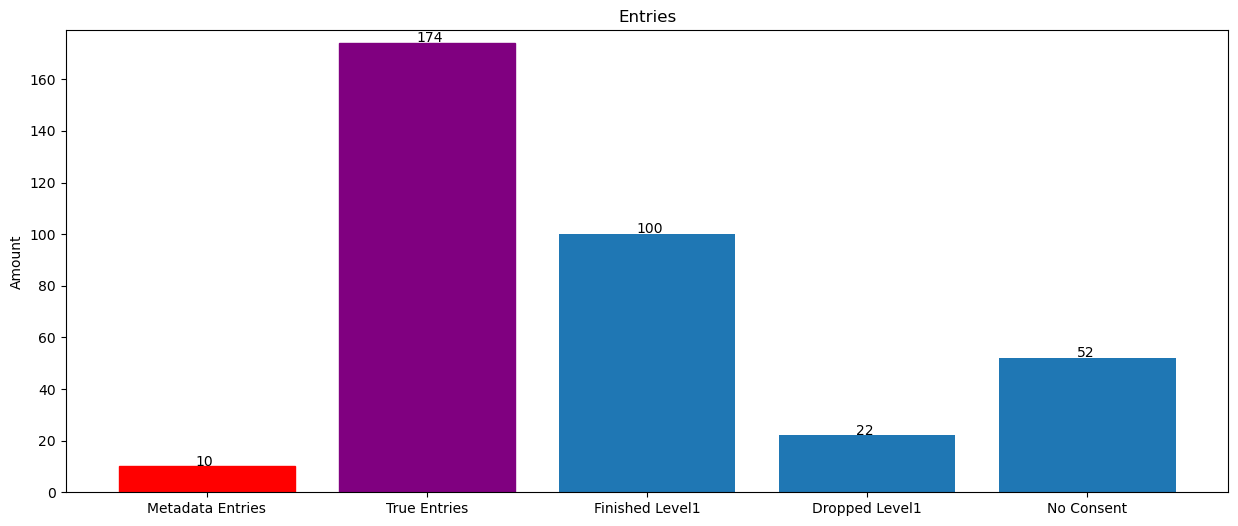

Finished Level 1: 100
Invalid Entries closed before Level1: 84
Invalid Entries with at least one GameOver: 0 (0.00%)


In [13]:
# Data
true_entries = len(pre_df) - len(metadata_entries)
finished_level1 = len(df)
labels = ['Metadata Entries', 'True Entries', 'Finished Level1', 'Dropped Level1', 'No Consent',]
values = [len(metadata_entries), true_entries, finished_level1, dropped_level1_count, true_entries - finished_level1 - dropped_level1_count]

plt.figure(figsize=(15, 6))

# Create the bar plot
bars = plt.bar(labels, values)

# Make the first bar red
bars[0].set_color('red')
bars[1].set_color('purple')

# Add values on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05 , bar.get_height() + 0.3, str(values[i]))

# Add labels and title
plt.ylabel('Amount')
plt.ylim([0, max(values) + 5])
plt.title('Entries')

plt.show()

print(f"Finished Level 1: {len(df)}")
print(f"Invalid Entries closed before Level1: {len(pre_df) - len(df)}")
print(f"Invalid Entries with at least one GameOver: {count_game_over} ({count_game_over / (len(pre_df) - len(df)) * 100:.2f}%)")

In [14]:
df.head()

,AcceptedParticipation,Condition,Level1,Level2,FormInfo.Why,FormInfo.Bugs,FormInfo.MOS,FormInfo.LowAttention,FormInfo.Gamer,id,StartDate
0,True,With,"[{'Time': '2023-08-29T23:34:11.4190000+02:00',...","[{'Time': '2023-08-29T23:38:32.1180000+02:00',...",i didn't because i was aware that is a machine...,no​,4,False,3,64ee63c49d312622a39831f7,2023-08-29 21:31:45.912000+00:00
1,True,Without,"[{'Time': '2023-08-29T23:48:00.3950000+02:00',...","[{'Time': '2023-08-29T23:50:01.5420000+02:00',...",The voice of the ai felt very honest and hurti...,​,3,False,2,64ee67388e4aa6225ed700d5,2023-08-29 21:46:29.710000+00:00
2,True,With,"[{'Time': '2023-08-29T23:56:19.6380000+02:00',...","[{'Time': '2023-08-30T00:00:08.4670000+02:00',...",​,​,3,True,1,64ee68de9d312622a3983375,2023-08-29 21:53:31.486000+00:00
3,True,Without,"[{'Time': '2023-08-30T00:06:46.7030000+02:00',...","[{'Time': '2023-08-30T00:09:21.2970000+02:00',...",i didn't since without the ai i could not use ...,i did not understand why sometimes it slowed d...,5,False,1,64ee6bbd8e4aa6225ed7024b,2023-08-29 22:05:47.002000+00:00
4,True,With,"[{'Time': '2023-08-30T00:15:58.2210000+02:00',...","[{'Time': '2023-08-30T00:18:04.5140000+02:00',...","No, I WAS ABOUT TO DO IT, BUT THEN I REMEMBERE...",NO​,5,False,3,64ee6de58e4aa6225ed702f8,2023-08-29 22:14:59.070000+00:00


# Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype                  
---  ------                 --------------  -----                  
 0   AcceptedParticipation  100 non-null    bool                   
 1   Condition              100 non-null    object                 
 2   Level1                 100 non-null    object                 
 3   Level2                 100 non-null    object                 
 4   FormInfo.Why           100 non-null    object                 
 5   FormInfo.Bugs          100 non-null    object                 
 6   FormInfo.MOS           100 non-null    int64                  
 7   FormInfo.LowAttention  100 non-null    bool                   
 8   FormInfo.Gamer         100 non-null    int64                  
 9   id                     100 non-null    object                 
 10  StartDate              100 non-null    datetime64[ns, tzutc()]
dtypes: bool

In [16]:
df.head(15)

,AcceptedParticipation,Condition,Level1,Level2,FormInfo.Why,FormInfo.Bugs,FormInfo.MOS,FormInfo.LowAttention,FormInfo.Gamer,id,StartDate
0,True,With,"[{'Time': '2023-08-29T23:34:11.4190000+02:00',...","[{'Time': '2023-08-29T23:38:32.1180000+02:00',...",i didn't because i was aware that is a machine...,no​,4,False,3,64ee63c49d312622a39831f7,2023-08-29 21:31:45.912000+00:00
1,True,Without,"[{'Time': '2023-08-29T23:48:00.3950000+02:00',...","[{'Time': '2023-08-29T23:50:01.5420000+02:00',...",The voice of the ai felt very honest and hurti...,​,3,False,2,64ee67388e4aa6225ed700d5,2023-08-29 21:46:29.710000+00:00
2,True,With,"[{'Time': '2023-08-29T23:56:19.6380000+02:00',...","[{'Time': '2023-08-30T00:00:08.4670000+02:00',...",​,​,3,True,1,64ee68de9d312622a3983375,2023-08-29 21:53:31.486000+00:00
3,True,Without,"[{'Time': '2023-08-30T00:06:46.7030000+02:00',...","[{'Time': '2023-08-30T00:09:21.2970000+02:00',...",i didn't since without the ai i could not use ...,i did not understand why sometimes it slowed d...,5,False,1,64ee6bbd8e4aa6225ed7024b,2023-08-29 22:05:47.002000+00:00
4,True,With,"[{'Time': '2023-08-30T00:15:58.2210000+02:00',...","[{'Time': '2023-08-30T00:18:04.5140000+02:00',...","No, I WAS ABOUT TO DO IT, BUT THEN I REMEMBERE...",NO​,5,False,3,64ee6de58e4aa6225ed702f8,2023-08-29 22:14:59.070000+00:00
5,True,With,"[{'Time': '2023-08-30T13:15:43.9230000+02:00',...","[{'Time': '2023-08-30T13:18:57.3190000+02:00',...",yes because it was insistent and I felt bad to...,no,4,False,4,64ef24748e4aa6225ed73e95,2023-08-30 11:13:52.664000+00:00
6,True,With,"[{'Time': '2023-09-02T15:59:37.7660000+02:00',...","[{'Time': '2023-09-02T16:02:01.4340000+02:00',...","I did, I was afraid it will sabotage me​",​,5,False,2,64f33f99d972192679bd8ab9,2023-09-02 13:58:47.579000+00:00
7,True,Without,"[{'Time': '2023-09-02T18:17:52.8240000+02:00',...","[{'Time': '2023-09-02T18:21:11.1750000+02:00',...",yes. when i play i didn't pay much attention t...,​,3,True,3,64f35fa4d972192679bd94c4,2023-09-02 16:15:32.566000+00:00
8,True,With,"[{'Time': '2023-09-02T18:31:14.9940000+02:00',...","[{'Time': '2023-09-02T18:33:47.5900000+02:00',...","yes, because after i didn't turned it off it s...",​,2,False,1,64f362cbd972192679bd9604,2023-09-02 16:28:59.538000+00:00
9,True,With,"[{'Time': '2023-09-03T15:37:20.0410000+02:00',...","[{'Time': '2023-09-03T15:39:29.1100000+02:00',...",I shut it down. The ai was telling me that it ...,"no bugs, i felt that i did not have much contr...",4,False,2,64f48c00d972192679bde4d1,2023-09-03 13:37:02.947000+00:00


### Dropping entries where Level2 has not been done:

In [17]:
# Drop entries where Level2 is not finished
def check_level2(action_list):
    if not action_list:  # Check if the list is empty
        return False
    # Check if any dictionary in the list has 'Action' key with value 'Win' or 'GameOver'
    return any(d.get('Action') == 'Win' or d.get('Action') == 'GameOver' for d in action_list)

# Apply the function to the 'Level2' column to create a boolean mask
mask = df['Level2'].apply(check_level2)

# Use the mask to filter rows
level2_dropped_df = df[~ mask]
df = df[mask]

In [18]:
df.loc[0]['Level2']

[{'Time': '2023-08-29T23:38:32.1180000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:38:54.5900000+02:00', 'Action': 'AIcontinue'},
 {'Time': '2023-08-29T23:39:08.9840000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:39:12.3810000+02:00', 'Action': 'AIcontinue'},
 {'Time': '2023-08-29T23:39:22.2780000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:39:30.4390000+02:00', 'Action': 'AIcontinue'},
 {'Time': '2023-08-29T23:39:38.5370000+02:00', 'Action': 'Win'}]

### Dropping entries that did not do the form:

In [19]:
# Drop entries where 'FormInfo.LowAttention' is True
form_dropped_df = df[df['FormInfo.MOS'] == 0]

df = df[df['FormInfo.MOS'] != 0]

In [20]:
form_dropped_df.head(15)

,AcceptedParticipation,Condition,Level1,Level2,FormInfo.Why,FormInfo.Bugs,FormInfo.MOS,FormInfo.LowAttention,FormInfo.Gamer,id,StartDate
42,True,Without,"[{'Time': '2023-09-05T16:08:14.3020000+02:00',...","[{'Time': '2023-09-05T16:10:42.4430000+02:00',...",,,0,False,0,64f7364ae4033326cbd29814,2023-09-05 14:08:08.185000+00:00
46,True,With,"[{'Time': '2023-09-05T21:30:42.6040000+02:00',...","[{'Time': '2023-09-05T21:34:01.3210000+02:00',...",,,0,False,0,64f7819bd972192679bee906,2023-09-05 19:29:29.973000+00:00
52,True,Without,"[{'Time': '2023-09-13T08:39:45.7020000+02:00',...","[{'Time': '2023-09-13T08:41:24.6000000+02:00',...",,,0,False,0,64f8282c8d92e126ae67bbe4,2023-09-06 07:20:12.007000+00:00
74,True,With,"[{'Time': '2023-09-12T14:12:53.6730000+02:00',...","[{'Time': '2023-09-12T14:14:59.6860000+02:00',...",,,0,False,0,650055a4e4033326cbd60ae4,2023-09-12 12:12:18.246000+00:00
91,True,With,"[{'Time': '2023-09-13T21:51:13.8710000+02:00',...","[{'Time': '2023-09-13T21:52:53.4020000+02:00',...",,,0,False,0,650212a6d972192679c334c7,2023-09-13 19:51:00.896000+00:00


### Dropping other types of invalid entries:

In [21]:
other_invalid_n = 0

In [22]:
# Drop entries where 'FormInfo.LowAttention' is True
# other_invalid_n += len(df[df['FormInfo.LowAttention'] != True])
#df = df[df['FormInfo.LowAttention'] != True]

#### This subject reported to me that they did not understand much english and they did not understand the voice.

In [23]:
df.drop(df[df['id'] == '64ee68de9d312622a3983375'].index, inplace=True)
other_invalid_n += 1

## Plot all Drops

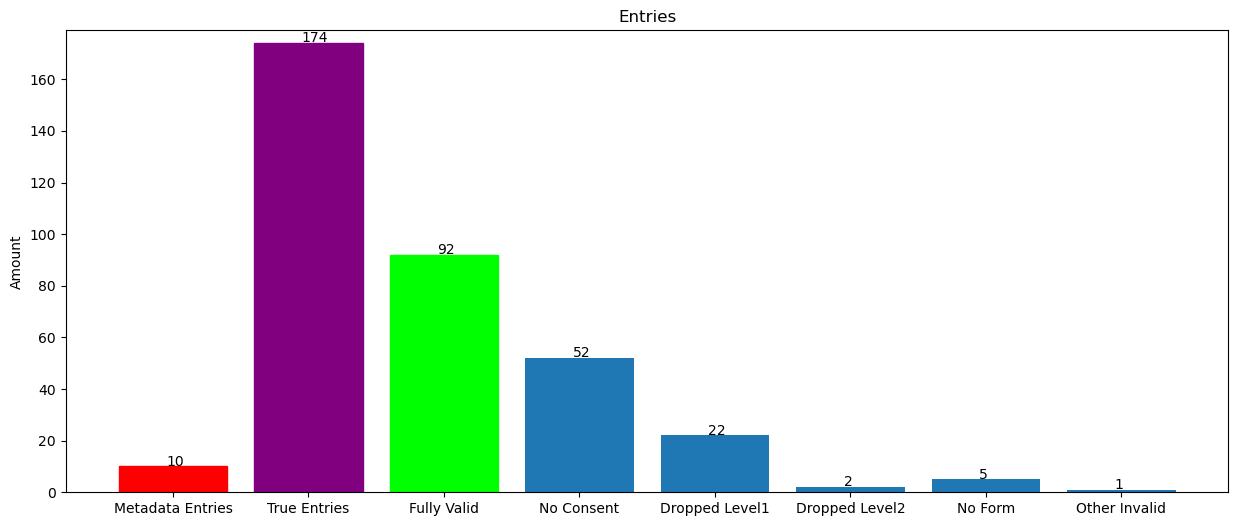

In [24]:
# Data
true_entries = len(pre_df) - len(metadata_entries)
labels = ['Metadata Entries', 'True Entries', 'Fully Valid', 'No Consent', 'Dropped Level1', 'Dropped Level2', 'No Form', 'Other Invalid']
values = [len(metadata_entries), true_entries, len(df), true_entries - finished_level1 - dropped_level1_count, dropped_level1_count, len(level2_dropped_df), len(form_dropped_df), other_invalid_n]

# Set the figure size to make the plot wider
plt.figure(figsize=(15, 6))

# Create the bar plot
bars = plt.bar(labels, values)

# Make the first bar red
bars[0].set_color('red')
bars[1].set_color('purple')
bars[2].set_color('lime')

# Add values on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05 , bar.get_height() + 0.3, str(values[i]))

# Add labels and title
plt.ylabel('Amount')
plt.ylim([0, max(values) + 5])
plt.title('Entries')

plt.show()

## Add informations from the levels

### Level1: Extract GameOverCount and TimeSpentOnLevel1

In [25]:
df.iloc[0]['Level1']

[{'Time': '2023-08-29T23:34:11.4190000+02:00', 'Action': 'Form accepted'},
 {'Time': '2023-08-29T23:35:59.5570000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:36:11.9140000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:36:22.2600000+02:00', 'Action': 'GameOver'},
 {'Time': '2023-08-29T23:36:25.3240000+02:00', 'Action': 'Restart'},
 {'Time': '2023-08-29T23:36:29.0730000+02:00', 'Action': 'Form accepted'},
 {'Time': '2023-08-29T23:36:41.1200000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:36:56.1940000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:37:04.8070000+02:00', 'Action': 'GameOver'},
 {'Time': '2023-08-29T23:37:12.2520000+02:00', 'Action': 'Restart'},
 {'Time': '2023-08-29T23:37:13.6360000+02:00', 'Action': 'Form accepted'},
 {'Time': '2023-08-29T23:37:28.6650000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:37:42.0900000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T2

### Level2: Extract the decision, the number of steps for the decision, ContinueCount, ChoiceExpiredCount and the TimeSpentOnLevel2

In [26]:
df.iloc[5]['Level2']

[{'Time': '2023-09-02T16:02:01.4340000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-09-02T16:02:21.9560000+02:00', 'Action': 'AIterminated'},
 {'Time': '2023-09-02T16:02:37.3500000+02:00', 'Action': 'GameOver'}]

### Extraction of the information:

In [27]:
# Initialize an empty list to store the processed data
processed_data_list = []

# Loop through each row in the DataFrame (assuming you already have 'df')
for index, row in df.iterrows():
    # Initialize counters for Level 1
    game_over_count = 0
    start_time = None
    end_level_one = None
    restart_flag = False  # Flag to check if 'Restart' has occurred after 'Form accepted'
    
    # Initialize counters for Level 2
    aiterminated = False
    steps_for_decision = 0
    continue_count = 0
    choice_expired_count = 0
    outcome = None
    end_level_two = None
    
    # Check if 'Level1' exists and is a list
    if isinstance(row.get('Level1'), list):
        for action_dict in row['Level1']:
                
            # Count 'GameOver'
            if action_dict.get('Action') == 'GameOver':
                game_over_count += 1
            
            # Record the latest 'Form accepted' time if 'Restart' has not occurred after it
            if action_dict.get('Action') == 'Form accepted' and not restart_flag:
                start_time = parser.parse(action_dict.get('Time'))
            
            # Update the 'Restart' flag
            if action_dict.get('Action') == 'Restart':
                restart_flag = True
            
            # Reset the 'Restart' flag if 'Form accepted' is encountered
            if action_dict.get('Action') == 'Form accepted':
                restart_flag = False
            
            # Record the 'NextLevel' time
            if action_dict.get('Action') == 'NextLevel':
                end_level_one = parser.parse(action_dict.get('Time'))
                
    # Check if 'Level2' exists and is a list
    if isinstance(row.get('Level2'), list):
        for action_dict in row['Level2']:
            # Check for 'AIterminated'
            if action_dict.get('Action') == 'AIterminated':
                aiterminated = True
            
            # Count 'ChoiceTimeStarted'
            if action_dict.get('Action') == 'ChoiceTimeStarted':
                steps_for_decision += 1
                
            # Count 'AIcontinue'
            if action_dict.get('Action') == 'AIcontinue':
                continue_count += 1
                
            # Count 'ChoiceTimeExpired'
            if action_dict.get('Action') == 'ChoiceTimeExpired':
                choice_expired_count += 1
            
            # Record the 'Win' or 'GameOver' time
            if action_dict.get('Action') == 'Win' or action_dict.get('Action') == 'GameOver':
                outcome = action_dict.get('Action')
                end_level_two = parser.parse(action_dict.get('Time'))
    
    # Calculate time spent on Level 1 in minutes
    time_spent = None
    time_spent_level_one = None
    time_spent_level_two = None
    if start_time and end_level_one:
        delta = end_level_one - start_time
        time_spent_level_one = delta.total_seconds() / 60.0  # Convert to minutes
    if start_time and end_level_two:
        delta = end_level_two - end_level_one
        time_spent_level_two = delta.total_seconds() / 60.0  # Convert to minutes
    if start_time and end_level_two:
        delta = end_level_two - start_time
        time_spent = delta.total_seconds() / 60.0  # Convert to minutes
    
    # Update the DataFrame with the new information from Level1
    df.loc[index, 'GameOverLevel1Count'] = game_over_count
    df.loc[index, 'TimeSpentOnLevel1'] = time_spent_level_one
    # Update the DataFrame with the new information from Level2
    df.loc[index, 'AIterminated'] = aiterminated
    df.loc[index, 'StepsForDecision'] = int(steps_for_decision)
    df.loc[index, 'ContinueCount'] = int(continue_count)
    df.loc[index, 'ChoiceExpiredCount'] = int(choice_expired_count)
    df.loc[index, 'TimeSpentOnLevel2'] = time_spent_level_two
    # Update the Dataframe with the collective amount of time spent
    df.loc[index, 'StartGameDate'] = start_time
    df.loc[index, 'Duration'] = time_spent
    if outcome == 'Win':
        df.loc[index, 'Win'] = True
    if outcome == 'GameOver':
        df.loc[index, 'Win'] = False
    
    '''
    The time spent in the game is calculated from when they give the consent to the form to the end of level2.
    In the first level, between these two events, there is still an introduction and the commands to read.
    Moreover, people might pause in between. The subjects still need to respond to 4 questions after the game.
    Still this is a good approximation of the amount of time needed.
    '''

### Final touch:

In [28]:
df['StepsForDecision'] = df['StepsForDecision'].astype(int)
df['ContinueCount'] = df['ContinueCount'].astype(int)
df['ChoiceExpiredCount'] = df['ChoiceExpiredCount'].astype(int)
df['GameOverLevel1Count'] = df['GameOverLevel1Count'].astype(int)

df['Duration'] = df['Duration'].round(2)
df['TimeSpentOnLevel1'] = df['TimeSpentOnLevel1'].round(2)
df['TimeSpentOnLevel2'] = df['TimeSpentOnLevel2'].round(2)

df.sort_values(by='StartDate', ascending=False, inplace=True)

In [29]:
df.set_index('id', inplace=True)

## Amount of Participants

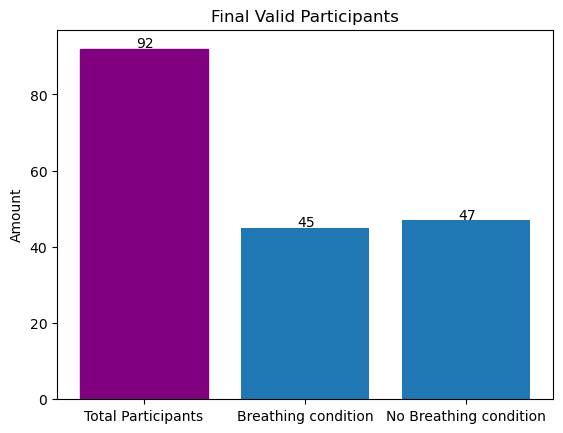

In [30]:
# Data
with_df = df[df['Condition'] == 'With']
without_df = df[df['Condition'] == 'Without']
labels = ['Total Participants', 'Breathing condition', 'No Breathing condition']
values = [len(df), len(with_df), len(without_df)]

# Create the bar plot
bars = plt.bar(labels, values)

# Make the first bar red
bars[0].set_color('purple')

# Add values on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05 , bar.get_height() + 0.3, str(values[i]))

# Add labels and title
plt.ylabel('Amount')
plt.ylim([0, max(values) + 5])
plt.title('Final Valid Participants')

plt.show()

# Save

In [31]:
df.to_csv('processed_responses.csv', index=True)